In [2]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras import models
from keras.layers import Input, Dense


In [4]:
from keras.datasets import imdb 
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=10000)

In [5]:
data = np.concatenate((X_train, X_test), axis=0)

In [6]:
label = np.concatenate((y_train, y_test), axis=0)

In [10]:
X_train.shape 

(25000,)

In [12]:
X_test.shape

(25000,)

In [14]:
y_train.shape 

(25000,)

In [16]:
y_test.shape 

(25000,)

In [18]:
print("Review is ",X_train[0])

Review is  [1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [20]:
print("Review is ",y_train[0])

Review is  1


In [22]:
vocab=imdb.get_word_index()

In [24]:
for i, (word, index) in enumerate(vocab.items()):
    if i >= 20:
        break
    print(f"{word}: {index}")

fawn: 34701
tsukino: 52006
nunnery: 52007
sonja: 16816
vani: 63951
woods: 1408
spiders: 16115
hanging: 2345
woody: 2289
trawling: 52008
hold's: 52009
comically: 11307
localized: 40830
disobeying: 30568
'royale: 52010
harpo's: 40831
canet: 52011
aileen: 19313
acurately: 52012
diplomat's: 52013


In [26]:
y_train 

array([1, 0, 0, ..., 0, 1, 0], dtype=int64)

In [28]:
y_test

array([0, 1, 1, ..., 0, 0, 0], dtype=int64)

In [30]:
def vectorize(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

In [32]:
test_x = data[:10000] 
test_y = label[:10000] 
train_x = data[10000:] 
train_y = label[10000:] 

In [34]:
test_x.shape

(10000,)

In [36]:
test_y.shape

(10000,)

In [38]:
train_x.shape

(40000,)

In [40]:
train_y.shape 

(40000,)

In [42]:
print("Categories:", np.unique(label)) 
print("Number of unique words:", len(np.unique(np.hstack(data))))

Categories: [0 1]
Number of unique words: 9998


In [43]:
length = [len(i) for i in data] 
print("Average Review length:", np.mean(length)) 
print("Standard Deviation:", round(np.std(length))) 

Average Review length: 234.75892
Standard Deviation: 173


In [44]:
print("Label:", label[0]) 

Label: 1


In [45]:
print("Label:", label[1])

Label: 0


In [50]:
print(data[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [52]:
index = imdb.get_word_index()

In [54]:
reverse_index = dict([(value, key) for (key, value) in index.items()]) 

In [56]:
decoded = " ".join( [reverse_index.get(i - 3, "#") for i in data[0]] )

In [58]:
print(decoded)

# this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert # is an amazing actor and now the same being director # father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for # and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also # to the two little boy's that played the # of norman and paul they were just brilliant children are often left out of the # list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you thi

In [60]:
data = vectorize(data) 

In [61]:
label = np.array(label).astype("float32")

In [62]:
labelDF=pd.DataFrame({'label':label}) 

<Axes: xlabel='label', ylabel='count'>

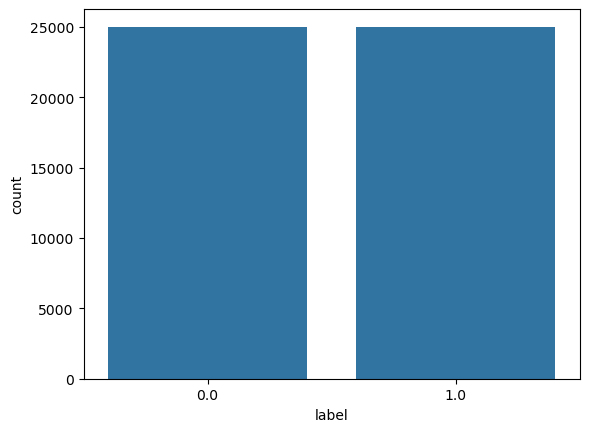

In [63]:
sns.countplot(x='label', data=labelDF)

In [64]:
from sklearn.model_selection import train_test_split

In [65]:
X_train, X_test, y_train, y_test = train_test_split(data,label, test_size=0.20, random_state=1)

In [66]:
X_train.shape

(40000, 10000)

In [67]:
X_test.shape 

(10000, 10000)

In [68]:
from keras.utils import to_categorical 
from keras import models 
from keras import layers 

In [70]:
model = models.Sequential([
    Input(shape=(10000,)),
    Dense(50, activation="relu")
])

In [80]:
model.add(layers.Dropout(0.3, noise_shape=None, seed=None)) 
model.add(layers.Dense(50, activation = "relu")) 
model.add(layers.Dropout(0.2, noise_shape=None, seed=None)) 
model.add(layers.Dense(50, activation = "relu")) 

In [81]:
model.add(layers.Dense(1, activation = "sigmoid")) 
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 50)             │       500,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 50)             │         2,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 50)             │         2,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 505,201 (1.93 MB)

 Trainable params: 505,201 (1.93 MB)

 Non-trainable params: 0 (0.00 B)

In [83]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)

In [85]:
model.compile( 
optimizer = "adam", 
loss = "binary_crossentropy", 
metrics = ["accuracy"] 
)

In [88]:
from sklearn.model_selection import train_test_split

In [89]:
results = model.fit( 
X_train, y_train, 
epochs= 2, 
batch_size = 500, 
validation_data = (X_test, y_test), 
callbacks=[callback] 
)

Epoch 1/2
80/80 ━━━━━━━━━━━━━━━━━━━━ 7s 50ms/step - accuracy: 0.7370 - loss: 0.5218 - val_accuracy: 0.8957 - val_loss: 0.2579
Epoch 2/2
80/80 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.9182 - loss: 0.2160 - val_accuracy: 0.9002 - val_loss: 0.2548


In [91]:
print(np.mean(results.history["val_accuracy"]))

0.8979499936103821


In [92]:
score = model.evaluate(X_test, y_test, batch_size=500)

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8957 - loss: 0.2584


In [93]:
print('Test loss:', score[0]) 
print('Test accuracy:', score[1]) 

Test loss: 0.25476783514022827
Test accuracy: 0.9002000093460083


dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


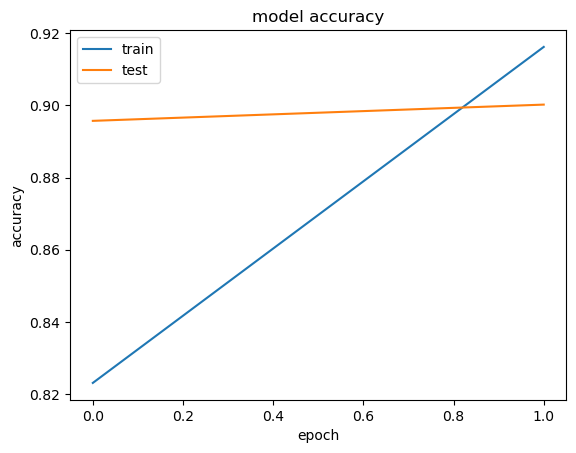

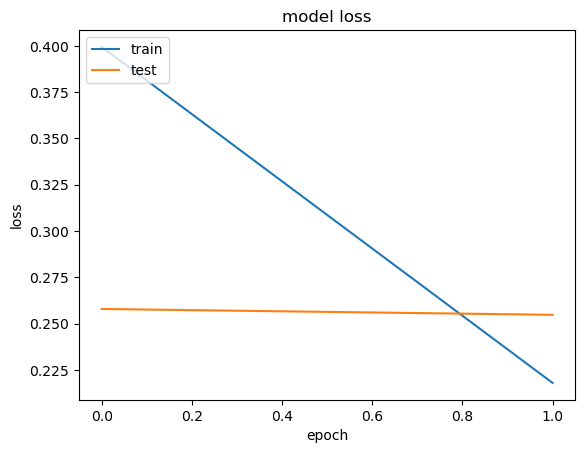

In [98]:
print(results.history.keys())
plt.plot(results.history['accuracy']) 
plt.plot(results.history['val_accuracy']) 
plt.title('model accuracy') 
plt.ylabel('accuracy') 
plt.xlabel('epoch') 
plt.legend(['train', 'test'], loc='upper left') 
plt.show()
plt.plot(results.history['loss']) 
plt.plot(results.history['val_loss']) 
plt.title('model loss') 
plt.ylabel('loss')
plt.xlabel('epoch') 
plt.legend(['train', 'test'], loc='upper left') 
plt.show() 